In [57]:
import cv2
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

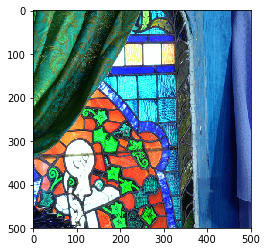

In [58]:
img=cv2.imread("./1.tif")
plt.imshow(img)

In [59]:
def bilateral_filter(X_matrix,size,sigma_d,sigma_r):
	X=np.zeros((len(X_matrix),len(X_matrix[0])))
	center=size//2    
	for j in range(center,len(X_matrix)-center,1):
		for k in range(center,len(X_matrix[0])-center,1):
			temp=0;
			w_sum=0;
			for m in range(-center,center+1,1):
				for n in range(-center,center+1,1):
					w=math.exp(-(((m)**2+(n)**2)/(2*sigma_d*sigma_d))-((abs(X_matrix[j+m][k+n]-X_matrix[j][k]))/(2*sigma_r*sigma_r)))
					temp+=X_matrix[j+m][k+n]*w;
					w_sum+=w;
			X[j][k]=temp//(w_sum);
	return X;

In [77]:
def interpolate(img):
    x,y,z=img.shape;
    x*=2
    y*=2
    image=np.zeros((x,y,3));
#     FIRST FILL ORIGINAL PIXELS
    for k in range(0,3,1):
        for i in range(0,x,2):
            for j in range(0,y,2):
                image[i,j,k]=img[i//2,j//2,k];
    fig, ax = plt.subplots(figsize=(18, 18))
    ax.imshow(image, interpolation='nearest')
#     plt.imshow(image)

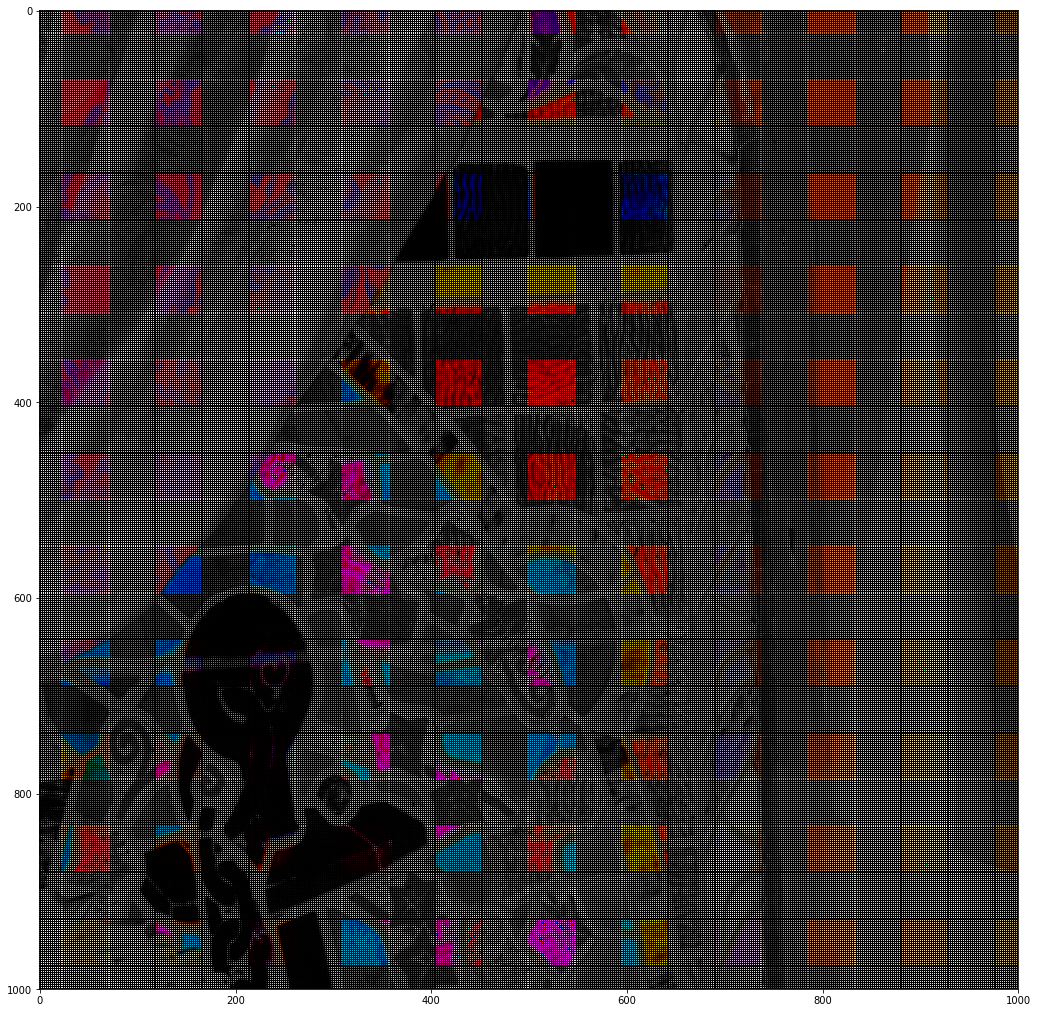

In [78]:
interpolate(img)